# Plot of the radial component of the magnetic field $B_r(\frac{r}{r_l})$ and $r \cdot B_r(\frac{r}{r_l})$

$\mathbf{\text{According Petri 2013, the expression of the radiale component is given by the eq.(1a):  }}$<br>
\begin{align*}
B_r &= {\beta}_{v}^2 \cdot B_L \cdot \frac{r_L^2}{r^2} \cdot \tanh(\frac{\Psi_s}{\Delta}) &( 1a)\\
&=  {\beta}_{v}^2 \cdot B_L \cdot \frac{1}{\frac{r^2}{r_L^2}} \cdot \tanh(\frac{\Psi_s}{\Delta}) \\
\end{align*}<br>

**Suppose** $ z = \frac{r^2}{r_L^2}$, __then__ ,   $ B_r = {\beta}_{v}^2 \cdot B_L \cdot \frac{1}{z}  \cdot \tanh(\frac{\Psi_s}{\Delta}) \\ $

The expression of $ \psi_s $ is given by the **Eq.(2) in Petri 2013**:
\begin{equation}
\psi_s = \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi - \Omega \cdot (t -\frac{r}{\beta_v \cdot c}) )
\end{equation}

Where $\beta_v = \frac{v}{c}$ , $\Omega = \frac{c}{r_L} $ and $ t = 0$

\begin{align*}
\psi_s &=  \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi - \frac{c}{r_L} \cdot (0 -\frac{r}{\frac{v}{c} \cdot c} ) \\
&= \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{c}{v} \cdot \frac{r}{r_L}) \\
&= \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{1}{\frac{v}{c}} \cdot z) \\
&= \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{1}{\beta_v} \cdot z) \\
\Rightarrow \psi_s = \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{z}{\beta_v})
\end{align*}

\begin{align*}
\gamma_v &= \frac{1}{\sqrt{1 - \beta_v^2}} \\
\gamma_v^2 &= \frac{1}{1 - \beta_v^2} \\
\gamma_v^2 \cdot (1 - \beta_v^2) &= 1 \\
\gamma_v^2 - \gamma_v^2 \cdot \beta_v^2 &= 1 \\
\gamma_v^2 \cdot \beta_v^2 &= \gamma_v^2 - 1 \\
\beta_v^2 &= \frac{\gamma_v^2 - 1}{\gamma_v^2} \\
\beta_v &= \sqrt{\frac{\gamma_v^2 - 1}{\gamma_v^2}} \\
\beta_v &= \frac{\sqrt{\gamma_v^2 - 1}}{\gamma_v}
\end{align*}

$ \Rightarrow B_r = {\beta}_{v}^2 \cdot B_L \cdot \frac{1}{z}  \cdot \tanh(\frac{\psi_s}{\Delta})$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
omega = 2*np.pi*0.008538220
omega

0.05364721845346688

In [3]:
rL = 2.99792458e+08 / omega
rL

5588219979.3832245

In [4]:
Bv = np.sqrt(1.2**2 - 1) / 1.2
Bv

0.5527707983925666

In [6]:
def gauss_to_tesla(gauss):
    """
    Convert Gauss to Tesla.

    Parameters:
        gauss : Value in Gauss.

    Returns:
        Value converted to Tesla.
    """
    
    tesla = gauss * 1e-4
    return tesla

BL_G = 0.03
BL_T = gauss_to_tesla(BL_G) # T ~ Tesla
print(f"{BL_G} Gauss is equal to {BL_T} Tesla.")

0.03 Gauss is equal to 3e-06 Tesla.


In [7]:
def degrees_to_radians(degrees):
    """
    Convert degrees to radians.

    Parameters:
        degrees: Value in degrees.

    Returns:
        Value converted to radians.
    """
    
    radians = degrees * np.pi / 180
    return radians


Khi_d = 60  # khi in degrees
Khi_r = degrees_to_radians(Khi_d)
print(f"{Khi_d} degrees is equal to {Khi_r} radians.")

60 degrees is equal to 1.0471975511965976 radians.


In [8]:
Delta = 0.5
phi = np.pi / 2
theta = np.pi / 4
r = np.linspace(rL, 50*rL, 100)
z = r/rL
psi = np.cos(theta)*np.cos(Khi_r) + np.sin(theta)*np.sin(Khi_r)*np.cos(phi + z/Bv)
Br = Bv**2 * BL_T * 1/(z)**2 * np.tanh(psi/Delta)

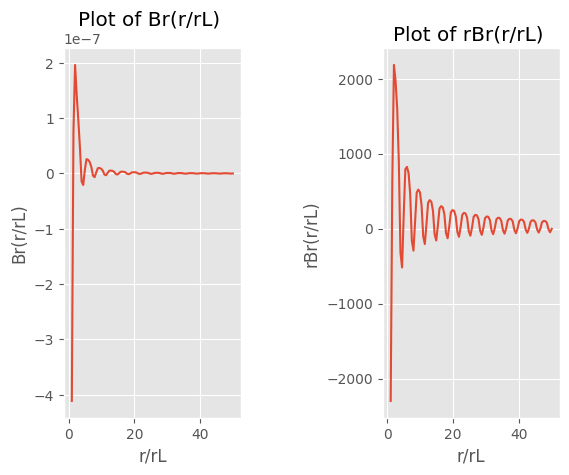

In [9]:
%matplotlib inline
plt.style.use('ggplot');

plt.subplots_adjust(hspace=0.4, wspace=0.8)

plt.subplot(121)
plt.plot(z, Br);
plt.title("Plot of Br(r/rL) ")
plt.xlabel("r/rL")
plt.ylabel("Br(r/rL)");

plt.subplot(122)
plt.plot(z, r*Br);
plt.title("Plot of rBr(r/rL) ")
plt.xlabel("r/rL")
plt.ylabel("rBr(r/rL)");